# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [2]:
df = pd.read_csv('all_penguins_clean.csv', index_col=0)
df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [3]:
df.shape

(334, 14)

In [4]:
# df.head()

#### 2. Select the Species column to use as target

In [5]:
y = df['Species'] #only 1 pair of square brackets to denote a pandas Series / Vector

#### 3. Select two columns to use as input features

In [6]:
X = df[['Culmen Depth (mm)', 'Culmen Length (mm)']] #2 pairs of square brackets to denote a pandas DataFrame / Matrix

#### 4. Plot the data

<AxesSubplot:xlabel='Culmen Depth (mm)', ylabel='Culmen Length (mm)'>

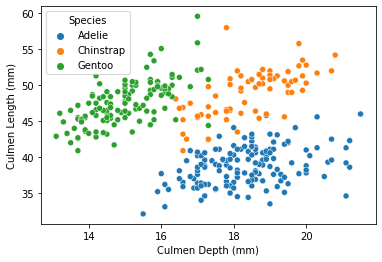

In [7]:
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y)

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [8]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
      
    if row['Culmen Length (mm)'] < 43:
        if row['Culmen Depth (mm)']  > 15:
            predictions.append('Adelie')
        else:
            predictions.append('Gentoo')
    else:
        if row['Culmen Depth (mm)'] < 16.5:
            predictions.append('Gentoo')
        else:
            predictions.append('Chinstrap')

#### 6. Calculate the accuracy of the model

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.937125748502994

## Find the optimal separation with Scikit

#### 7. Train the model

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
m = DecisionTreeClassifier(max_depth=2, criterion='entropy')  # we allow that many questions
m.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

#### 8. Make predictions

In [12]:
ypred = m.predict(X)

#### 9. Calculate the accuracy

In [13]:
accuracy_score(y, ypred)

0.9341317365269461

## Plot the tree

#### 10. Plot the tree with according labels

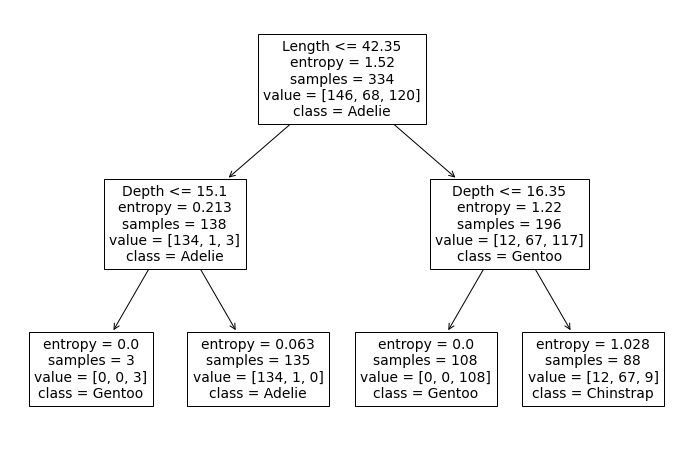

In [14]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=['Depth', 'Length'], class_names=['Adelie', 'Chinstrap', 'Gentoo'])

### The Decision Tree Algorithm

split(node, {samples}):

1. Determines the best feature for splitting the data*
2. Determines the best value / threshold for splitting*
    - Entropy (Computer Science) - ID3 Algorithm
    - Gini Impurity (Economics) - CART Algorithm
3. Create 2 children nodes (binary)
4. Split the {samples} across those nodes
5. Recurse! For each children node,

   > if subset is PURE, STOP!
   
   > else, split(child_node, {subset})


6 samples --> 6, 0 (100% Purity) -> Entropy = 0.0

6 samples --> 3, 3 (100% Impurity) -> Entropy = 1.0 (Maximum for binary classification)

### Entropy Calculations (BONUS):
- This part is just completely bonus, but if you're interested in the entropy formula (https://en.wikipedia.org/wiki/Entropy_(information_theory)), then you might find this informative. 
    - The other metric is the Gini Impurity, which uses a completely different formula.
- Also, this video is FANTASTIC in explaining the concept: https://www.youtube.com/watch?v=9r7FIXEAGvs

In [15]:
import numpy as np

**Starting entropy (At the root node)**

In [16]:
P_Adelie = (146)/(146+68+120)
P_Chin = (68)/(146+68+120)
P_Gent = (120)/(146+68+120)

entropy_root_node = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_root_node

1.5199655790772624

**Entropy after the first question / split**

In [17]:
P_Adelie = (134)/(134+1+3)
P_Chin = (1)/(134+1+3)
P_Gent = (3)/(134+1+3)

entropy_split_1a = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_split_1a

0.21279373921653882

In [18]:
P_Adelie = (12)/(12+67+117)
P_Chin = (67)/(12+67+117)
P_Gent = (117)/(12+67+117)

entropy_split_1b = -P_Adelie * np.log2(P_Adelie) - P_Chin * np.log2(P_Chin) - P_Gent * np.log2(P_Gent)
entropy_split_1b

1.2204231198265196

**Then, to calculate the INFORMATION GAIN of the first question, you take the weighted sum of the resulting entropies, and subtract that from the original starting entropy**:

In [19]:
Gain = entropy_root_node - (134+1+3)/(146+68+120)*entropy_split_1a - (12+67+117)/(146+68+120)*entropy_split_1b
Gain

0.7158683709997767

The Difference in entropy before the split and the entropy after the split is called `information gain`. We can think of this as the drop in entropy (which is what we want, b/c entropy basically means uncertainty), or the increase in information.
- In statistics this is called "mutual information"

So after the split, we are more certain than before about a given sample being of a given outcome. So we are moving in the right direction.

And the reason the first question was chosen (i.e. "is the Culmen shorter than 42.35 millimeters?") is because **that was the question that resulted in the largest information gain (0.71)** compared to all other possible questions. The algorithm keeps going as long as it can find questions that increase the information gain.

---

**Visualization of Decision Tree Boundaries:**

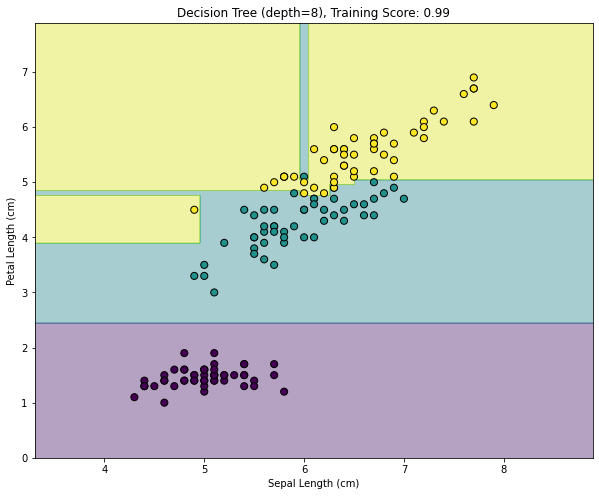

In [20]:
# Source code adapted (simplified) from Scikit-Learn website
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# © 2007 - 2019, scikit-learn developers (BSD License).

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# Loading some example data to play with
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Train a classification model
m = DecisionTreeClassifier(max_depth=8)
m.fit(X, y)
# What about other models? Try them here as well.

#step size in the mesh
h = 0.01

# Plotting decision regions
#For that, we will assign a color to each point in the mesh [x_min, x_max] * [y_min, y_max]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=8), Training Score: {round(m.score(X, y), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

**^^^ Beware of Overfitting!!**

### Advantages:
- Less Feature Engineering Required 
- Can create non-linear decision boundaries
- Inherent feature selection

### Disadvantages:
- Tendency to overfit
- Harder to interpret results (no coefficients)

In [21]:
m.feature_importances_ 
#similar to the coefficients of Logistic Regression, 
#but you can't make any statistical inferences from them
#but they provide a good rule of them of which features are important and which aren't.

array([0.06786793, 0.93213207])

---

### Random Forest Classifier Example

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
X = df[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Island']]

In [24]:
y = df['Species']

In [25]:
X = pd.get_dummies(X)

In [26]:
m = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=4)

In [27]:
m.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [28]:
m.score(X, y)

0.9940119760479041

In [29]:
m.feature_importances_

array([0.27845303, 0.1885653 , 0.23367715, 0.0910052 , 0.11013844,
       0.08054576, 0.01761512])

In [30]:
var_imp_dic = dict(zip(X.columns, m.feature_importances_))
var_imp_dic_df = pd.DataFrame.from_dict(var_imp_dic, orient='index')
var_imp_dic_df

,0
Culmen Length (mm),0.278453
Culmen Depth (mm),0.188565
Flipper Length (mm),0.233677
Body Mass (g),0.091005
Island_Biscoe,0.110138
Island_Dream,0.080546
Island_Torgersen,0.017615


In [31]:
var_imp_dic_df.columns = ['VarImp']
var_imp_dic_df.reset_index(inplace=True)
var_imp_dic_df = var_imp_dic_df.rename(columns = {'index':'Var'})
var_imp_dic_df

,Var,VarImp
0,Culmen Length (mm),0.278453
1,Culmen Depth (mm),0.188565
2,Flipper Length (mm),0.233677
3,Body Mass (g),0.091005
4,Island_Biscoe,0.110138
5,Island_Dream,0.080546
6,Island_Torgersen,0.017615


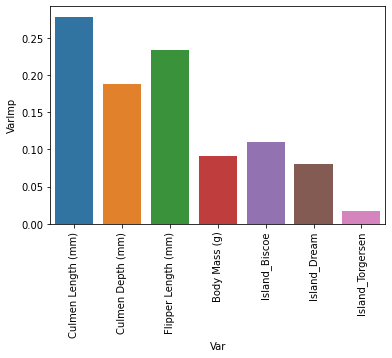

In [32]:
bp = sns.barplot(x='Var', y='VarImp', data=var_imp_dic_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);